# PCA

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option("display.max_columns", 100)

In [2]:
data = pd.read_csv("data/processed/full_county_dataset.csv")
data.head()

,name,fips,age_over_65,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,median_hh_income,smoking_ban,FIPS,incidence_rate_per_100k,recent_trend_cat,5yr_trend,County-State,chem_companies,unique_reported_chemicals,chem_Isododecenone,chem_Borated reaction product of polybutenyl succinic anhydride with ethylenediamine-piperazine,chem_Tetraalkoxy titanium salt reaction products with substituted alkanediones and substituted p,"chem_(Substituted-5-sulfophenyl heteromonocycle) azo-(substituted 2-hydroxyphenyl), iron complex","chem_Reaction product of polyalkenylphenol, alkylamine, formaldehyde andaliphatic acid",chem_Reaction product of diazotized alkyl derivatives of phenylazobenzenamine and mixed alkylami,"chem_Diazotized substituted benzenamines, coupling products with substituted benzene",chem_Ammonium salt of diisodecyl ester with sulfoalkanedioic acid,chem_Alkanolamine salts of alkanoic acid and benzene derivative,chem_Phosphosulfurized carbopolycycle reaction product with polybutenylsuccinic anhydride and po,chem_Mixed borate esters of isobutanol and dimethyl-hydroxy-alkenes,chem_Reaction product of methyl-ethyl-substituted-h eteromonocycle and alkanetriol triacrylate,chem_Substituted urea (PROVISIONAL),chem_Salt of aminoethylethanolaminetriphosphonic acid (PROVISIONAL),"chem_Substituted 4-aminonaphthalenedisulfonic acid, diazotized and coupled with 1,3-benzenediol,",chem_Alkyl acrylate ester of substituted cyclohexanecarboxylic acid,chem_Formaldehyde,"chem_Guanidine, hydrochloride (1:1)","chem_Propanoic acid, 2-hydroxy-",chem_Benzo[a]pyrene,chem_D-Glucitol,chem_L-Ascorbic acid,chem_D-Glucose,"chem_1,3-Benzodioxole, 5-[[2-(2-butoxyethoxy)ethoxy]methyl]-6-p ropyl-","chem_Carbamic acid, ethyl ester",chem_L-Cysteine,"chem_Mercurate(1-), ethyl[2-(mercapto-.kappa.S)benzoato(2-)- .kappa.O]-, sodium (1:1)",...,bminv_ORTHPIND,bminv_ORTHPTAX,bminv_PLECNTAX,bminv_PLECPIND,bminv_PLECPTAX,bminv_PREDNTAX,bminv_PREDPIND,bminv_PREDPTAX,bminv_SCRPNTAX,bminv_SCRPPIND,bminv_SCRPPTAX,bminv_SHRDNTAX,bminv_SHRDPIND,bminv_SHRDPTAX,bminv_SPWLNTAX,bminv_SPWLPIND,bminv_SPWLPTAX,bminv_STOLNTAX,bminv_STOLPIND,bminv_STOLPTAX,bminv_SWIMNTAX,bminv_SWIMPIND,bminv_SWIMPTAX,bminv_TANYNTAX,bminv_TANYPIND,bminv_TANYPTAX,bminv_TL01NTAX,bminv_TL01PIND,bminv_TL01PTAX,bminv_TL23NTAX,bminv_TL23PIND,bminv_TL23PTAX,bminv_TL45NTAX,bminv_TL45PIND,bminv_TL45PTAX,bminv_TL67NTAX,bminv_TL67PIND,bminv_TL67PTAX,bminv_TOLRNTAX,bminv_TOLRPIND,bminv_TOLRPTAX,bminv_TOTLNIND,bminv_TOTLNTAX,bminv_TRICNTAX,bminv_TRICPIND,bminv_TRICPTAX,bminv_TUBINAIDNTAX,bminv_TUBINAIDPIND,bminv_TUBINAIDPTAX,bminv_WTD_TV
0,Autauga County,1001,15.0,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,1.0,0.75,55317.0,0.0,1001.0,124.6,stable,0.3,autauga-al,2.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Baldwin County,1003,20.0,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,1.0,0.75,52562.0,0.0,1003.0,105.6,rising,1.0,baldwin-al,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.16,1.62,0.00,0.00,0.00,9.0,8.66,34.36,2.0,20.33,9.12,4.00,26.16,15.56,10.0,57.00,37.58,6.00,8.66,23.79,0.0,0.00,0.00,1.00,2.16,4.12,0.0,0.00,0.00,0.0,1.16,0.00,8.0,26.34,30.24,7.0,58.50,27.02,8.50,33.50,33.63,300.0,25.50,1.00,0.34,3.22,0.5,1.16,2.50,6.01
2,Barbour County,1005,18.6,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,0.0,0.50,33368.0,0.5,1005.0,77.9,stable,-1.6,barbour-al,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
data = data[data["5yr_trend"].notna()]
data.shape

(2426, 6803)

In [4]:
data_counties = data.iloc[:,:20].dropna()
data_counties.head(2)

,name,fips,age_over_65,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,median_hh_income,smoking_ban,FIPS,incidence_rate_per_100k,recent_trend_cat,5yr_trend
0,Autauga County,1001,15.0,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,1.0,0.75,55317.0,0.0,1001.0,124.6,stable,0.3
1,Baldwin County,1003,20.0,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,1.0,0.75,52562.0,0.0,1003.0,105.6,rising,1.0


In [5]:
data_counties.isnull().sum()

name                       0
fips                       0
age_over_65                0
state                      0
pop2000                    0
pop2010                    0
pop2017                    0
pop_change                 0
poverty                    0
homeownership              0
multi_unit                 0
unemployment_rate          0
metro                      0
median_edu                 0
median_hh_income           0
smoking_ban                0
 FIPS                      0
incidence_rate_per_100k    0
recent_trend_cat           0
5yr_trend                  0
dtype: int64

In [6]:
pca_data = data_counties.drop(columns = ["name", "fips", "state", "recent_trend_cat", "5yr_trend", "pop2010", "pop2000"])
X = pca_data.drop(columns = "incidence_rate_per_100k")
y = pca_data["incidence_rate_per_100k"]

In [7]:
X.head(3)

,age_over_65,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,median_hh_income,smoking_ban,FIPS
0,15.0,55504.0,1.48,13.7,77.5,7.2,3.86,1.0,0.75,55317.0,0.0,1001.0
1,20.0,212628.0,9.19,11.8,76.7,22.6,3.99,1.0,0.75,52562.0,0.0,1003.0
2,18.6,25270.0,-6.22,27.2,68.0,11.1,5.90,0.0,0.50,33368.0,0.5,1005.0


In [8]:
sc = StandardScaler()
sc.fit(X)
X_sc = sc.transform(X)

In [9]:
pca = PCA(n_components = 10)
pca.fit(X_sc)
pca.components_

array([[-0.23927824,  0.25223507,  0.30981405, -0.32666389, -0.16280721,
         0.35149301, -0.27924125,  0.32752017,  0.38833413,  0.43065507,
         0.06193402,  0.03205743],
       [-0.30746542,  0.25283458, -0.1080366 ,  0.4510525 , -0.57333965,
         0.38510762,  0.26394563,  0.04529164, -0.04559895, -0.24227062,
        -0.00252196, -0.12997648],
       [-0.27158799, -0.09339842,  0.30326921,  0.10309814, -0.01614901,
        -0.16156225, -0.05880576,  0.17836422, -0.15463475, -0.04729637,
        -0.8121425 ,  0.25991518],
       [-0.05811992,  0.13785577,  0.18780184,  0.03732096,  0.20379363,
        -0.18644503,  0.05873401,  0.22443734, -0.06944307,  0.02238056,
        -0.11636636, -0.88993018],
       [-0.03441996,  0.27029053,  0.18943771,  0.07764111,  0.26118715,
        -0.17032094,  0.56469871,  0.4961473 , -0.17237751,  0.06147499,
         0.29017448,  0.32229548],
       [ 0.62206613,  0.57607262, -0.17370118, -0.08337107,  0.03496368,
         0.13844995,  

In [10]:
X.values.dot(pca.components_.T)[0]

array([37836.53919788,   462.3169925 , -7544.89582031,  8013.5201641 ,
       18747.82556478, 29941.19021326, 35956.02899669,  7117.27792215,
       23134.02043852,   617.11136364])

In [11]:
pca.explained_variance_ratio_

array([0.30479298, 0.17816342, 0.09095036, 0.08283908, 0.07203208,
       0.06821049, 0.05601782, 0.05331569, 0.04338006, 0.02777764])

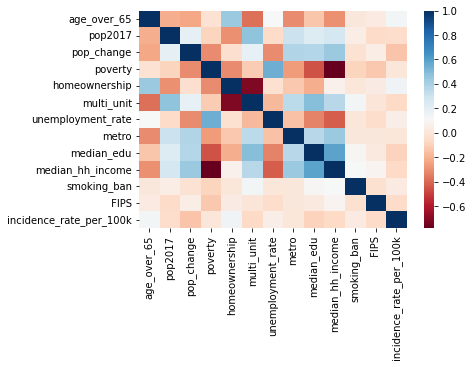

In [12]:
sns.heatmap(pca_data.corr(), cmap = "RdBu");

# Chemicals

In [13]:
data.head(3)

,name,fips,age_over_65,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,median_hh_income,smoking_ban,FIPS,incidence_rate_per_100k,recent_trend_cat,5yr_trend,County-State,chem_companies,unique_reported_chemicals,chem_Isododecenone,chem_Borated reaction product of polybutenyl succinic anhydride with ethylenediamine-piperazine,chem_Tetraalkoxy titanium salt reaction products with substituted alkanediones and substituted p,"chem_(Substituted-5-sulfophenyl heteromonocycle) azo-(substituted 2-hydroxyphenyl), iron complex","chem_Reaction product of polyalkenylphenol, alkylamine, formaldehyde andaliphatic acid",chem_Reaction product of diazotized alkyl derivatives of phenylazobenzenamine and mixed alkylami,"chem_Diazotized substituted benzenamines, coupling products with substituted benzene",chem_Ammonium salt of diisodecyl ester with sulfoalkanedioic acid,chem_Alkanolamine salts of alkanoic acid and benzene derivative,chem_Phosphosulfurized carbopolycycle reaction product with polybutenylsuccinic anhydride and po,chem_Mixed borate esters of isobutanol and dimethyl-hydroxy-alkenes,chem_Reaction product of methyl-ethyl-substituted-h eteromonocycle and alkanetriol triacrylate,chem_Substituted urea (PROVISIONAL),chem_Salt of aminoethylethanolaminetriphosphonic acid (PROVISIONAL),"chem_Substituted 4-aminonaphthalenedisulfonic acid, diazotized and coupled with 1,3-benzenediol,",chem_Alkyl acrylate ester of substituted cyclohexanecarboxylic acid,chem_Formaldehyde,"chem_Guanidine, hydrochloride (1:1)","chem_Propanoic acid, 2-hydroxy-",chem_Benzo[a]pyrene,chem_D-Glucitol,chem_L-Ascorbic acid,chem_D-Glucose,"chem_1,3-Benzodioxole, 5-[[2-(2-butoxyethoxy)ethoxy]methyl]-6-p ropyl-","chem_Carbamic acid, ethyl ester",chem_L-Cysteine,"chem_Mercurate(1-), ethyl[2-(mercapto-.kappa.S)benzoato(2-)- .kappa.O]-, sodium (1:1)",...,bminv_ORTHPIND,bminv_ORTHPTAX,bminv_PLECNTAX,bminv_PLECPIND,bminv_PLECPTAX,bminv_PREDNTAX,bminv_PREDPIND,bminv_PREDPTAX,bminv_SCRPNTAX,bminv_SCRPPIND,bminv_SCRPPTAX,bminv_SHRDNTAX,bminv_SHRDPIND,bminv_SHRDPTAX,bminv_SPWLNTAX,bminv_SPWLPIND,bminv_SPWLPTAX,bminv_STOLNTAX,bminv_STOLPIND,bminv_STOLPTAX,bminv_SWIMNTAX,bminv_SWIMPIND,bminv_SWIMPTAX,bminv_TANYNTAX,bminv_TANYPIND,bminv_TANYPTAX,bminv_TL01NTAX,bminv_TL01PIND,bminv_TL01PTAX,bminv_TL23NTAX,bminv_TL23PIND,bminv_TL23PTAX,bminv_TL45NTAX,bminv_TL45PIND,bminv_TL45PTAX,bminv_TL67NTAX,bminv_TL67PIND,bminv_TL67PTAX,bminv_TOLRNTAX,bminv_TOLRPIND,bminv_TOLRPTAX,bminv_TOTLNIND,bminv_TOTLNTAX,bminv_TRICNTAX,bminv_TRICPIND,bminv_TRICPTAX,bminv_TUBINAIDNTAX,bminv_TUBINAIDPIND,bminv_TUBINAIDPTAX,bminv_WTD_TV
0,Autauga County,1001,15.0,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,1.0,0.75,55317.0,0.0,1001.0,124.6,stable,0.3,autauga-al,2.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Baldwin County,1003,20.0,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,1.0,0.75,52562.0,0.0,1003.0,105.6,rising,1.0,baldwin-al,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.16,1.62,0.0,0.0,0.0,9.0,8.66,34.36,2.0,20.33,9.12,4.0,26.16,15.56,10.0,57.0,37.58,6.0,8.66,23.79,0.0,0.0,0.0,1.0,2.16,4.12,0.0,0.0,0.0,0.0,1.16,0.0,8.0,26.34,30.24,7.0,58.5,27.02,8.5,33.5,33.63,300.0,25.5,1.0,0.34,3.22,0.5,1.16,2.5,6.01
2,Barbour County,1005,18.6,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,0.0,0.50,33368.0,0.5,1005.0,77.9,stable,-1.6,barbour-al,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

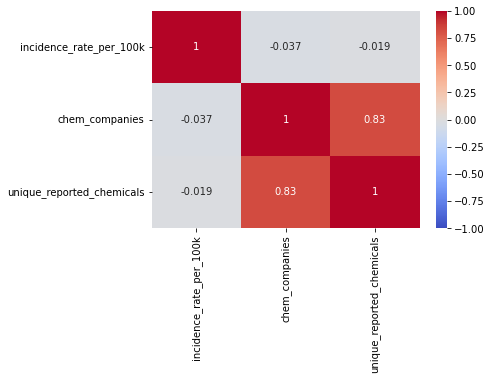

In [14]:
chem_cancer = data[["incidence_rate_per_100k", "chem_companies", "unique_reported_chemicals"]].dropna()
sns.heatmap(chem_cancer.corr(), cmap = "coolwarm", annot=True, vmin=-1, vmax=1);

In [15]:
chemicals = [col for col in data if col.startswith('chem')][1:] #+ ['recent_trend_cat']
chem_cancer = data[chemicals].dropna()

In [16]:
sc = StandardScaler()
chem_cancer_sc = sc.fit_transform(chem_cancer)

In [17]:
pca = PCA(n_components = 5)
pca.fit(chem_cancer_sc)
pca.components_

array([[ 8.86169488e-04,  6.50495421e-04, -4.31946394e-05, ...,
         3.72203056e-04, -8.97224323e-05, -8.97224323e-05],
       [ 2.01287855e-03,  4.34200393e-05,  1.68205949e-04, ...,
        -1.91675174e-04, -5.62614040e-05, -5.62614040e-05],
       [ 5.62919584e-02,  1.61158709e-03, -9.80210457e-05, ...,
        -2.29888334e-04, -1.65765579e-04, -1.65765579e-04],
       [-1.45296773e-02,  2.08622003e-03,  1.07808291e-03, ...,
         1.37867210e-05, -2.73038219e-04, -2.73038219e-04],
       [-1.33000697e-04,  8.61825370e-04,  3.13909762e-03, ...,
         1.35972247e-04, -1.62010632e-06, -1.62010632e-06]])

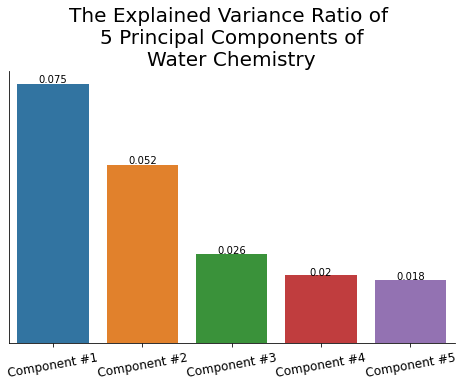

In [18]:
pca_chem = pca.explained_variance_ratio_

fig, ax = plt.subplots(1, figsize=(8,5))

sns.barplot(x=list(range(len(pca_chem))), y=pca_chem, ax=ax)
ax.set_title('The Explained Variance Ratio of \n5 Principal Components of\nWater Chemistry', fontsize=20)
ax.set_xticklabels(labels=[f"Component #{x}" for x in range(1, len(pca_chem)+1)], fontsize=12);
ax.tick_params(axis='y', which='both', left=False, labelleft=False)
ax.xaxis.set_tick_params(labelrotation=10)
ax.set_xlabel('')
sns.despine(fig)

# label bars
for bar in ax.patches:
    bar_height = round(bar.get_height(), 3)
    ax.annotate(bar_height, (bar.get_x() + bar.get_width()/2, bar.get_height()*1.01), 
                ha='center', color='black', fontsize=10)
    
fig.savefig(f'images/chem_pca.png', transparent=True, bbox_inches="tight");

In [19]:
# this has returned the chemicals which do not contribute in any way?

---

# Cancer Rivers

In [20]:
rivers = data[data.columns[6543:].tolist() + ['recent_trend_cat']].copy()
rivers.head(3)

,hab_XBKA,hab_MEDBK_A,hab_XUN,hab_MEDBKUN,hab_XCDENMID,hab_XCDENBK,hab_CONPERCENT,hab_PCT_FA,hab_PCT_DR,hab_PCT_FAST,hab_PCT_SLOW,hab_PCT_POOL,hab_XWIDTH,hab_SDWIDTH,hab_XBKF_W,hab_XBKF_H,hab_XINC_H,hab_SDINC_H,hab_BFWD_RAT,hab_XWXD,hab_XWD_RAT,hab_SDWXD,hab_SDWD_RAT,hab_XDEPTH_CM,hab_SDDEPTH_CM,hab_XFC_ALG,hab_XFC_RCK,hab_XFC_BRS,hab_XFC_LVT,hab_XFC_AQM,hab_XFC_OHV,hab_XFC_HUM,hab_XFC_UCB,hab_XFC_LWD,hab_XFC_NAT,hab_XFC_BIG,hab_XFC_ALL,hab_PCT_SIDE,hab_REACHLEN,hab_W1_HAG,hab_W1_HNOAG,hab_W1_HALL,hab_W1H_BLDG,hab_W1H_LDFL,hab_W1H_LOG,hab_W1H_MINE,hab_W1H_PARK,hab_W1H_PSTR,hab_W1H_PVMT,hab_W1H_PIPE,...,bminv_ORTHPTAX,bminv_PLECNTAX,bminv_PLECPIND,bminv_PLECPTAX,bminv_PREDNTAX,bminv_PREDPIND,bminv_PREDPTAX,bminv_SCRPNTAX,bminv_SCRPPIND,bminv_SCRPPTAX,bminv_SHRDNTAX,bminv_SHRDPIND,bminv_SHRDPTAX,bminv_SPWLNTAX,bminv_SPWLPIND,bminv_SPWLPTAX,bminv_STOLNTAX,bminv_STOLPIND,bminv_STOLPTAX,bminv_SWIMNTAX,bminv_SWIMPIND,bminv_SWIMPTAX,bminv_TANYNTAX,bminv_TANYPIND,bminv_TANYPTAX,bminv_TL01NTAX,bminv_TL01PIND,bminv_TL01PTAX,bminv_TL23NTAX,bminv_TL23PIND,bminv_TL23PTAX,bminv_TL45NTAX,bminv_TL45PIND,bminv_TL45PTAX,bminv_TL67NTAX,bminv_TL67PIND,bminv_TL67PTAX,bminv_TOLRNTAX,bminv_TOLRPIND,bminv_TOLRPTAX,bminv_TOTLNIND,bminv_TOTLNTAX,bminv_TRICNTAX,bminv_TRICPIND,bminv_TRICPTAX,bminv_TUBINAIDNTAX,bminv_TUBINAIDPIND,bminv_TUBINAIDPTAX,bminv_WTD_TV,recent_trend_cat
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stable
1,34.535463,30.429749,0.541787,0.386457,50.636641,27.74,0.0,0.0,0.0,0.0,100.0,100.0,235.6,208.36,242.92,0.16,0.48,0.32,88.03,829.5,94.9,620.5,114.91,288.26,123.54,0.14,0.0,0.0,0.15,0.34,0.02,0.0,0.0,0.0,0.16,0.0,0.65,1.5,3936.42,0.0,0.62,0.62,0.19,0.06,0.0,0.0,0.15,0.0,0.06,0.0,...,1.62,0.0,0.0,0.0,9.0,8.66,34.36,2.0,20.33,9.12,4.0,26.16,15.56,10.0,57.0,37.58,6.0,8.66,23.79,0.0,0.0,0.0,1.0,2.16,4.12,0.0,0.0,0.0,0.0,1.16,0.0,8.0,26.34,30.24,7.0,58.5,27.02,8.5,33.5,33.63,300.0,25.5,1.0,0.34,3.22,0.5,1.16,2.5,6.01,rising
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stable


In [21]:
rivers.describe()

,hab_XBKA,hab_MEDBK_A,hab_XUN,hab_MEDBKUN,hab_XCDENMID,hab_XCDENBK,hab_CONPERCENT,hab_PCT_FA,hab_PCT_DR,hab_PCT_FAST,hab_PCT_SLOW,hab_PCT_POOL,hab_XWIDTH,hab_SDWIDTH,hab_XBKF_W,hab_XBKF_H,hab_XINC_H,hab_SDINC_H,hab_BFWD_RAT,hab_XWXD,hab_XWD_RAT,hab_SDWXD,hab_SDWD_RAT,hab_XDEPTH_CM,hab_SDDEPTH_CM,hab_XFC_ALG,hab_XFC_RCK,hab_XFC_BRS,hab_XFC_LVT,hab_XFC_AQM,hab_XFC_OHV,hab_XFC_HUM,hab_XFC_UCB,hab_XFC_LWD,hab_XFC_NAT,hab_XFC_BIG,hab_XFC_ALL,hab_PCT_SIDE,hab_REACHLEN,hab_W1_HAG,hab_W1_HNOAG,hab_W1_HALL,hab_W1H_BLDG,hab_W1H_LDFL,hab_W1H_LOG,hab_W1H_MINE,hab_W1H_PARK,hab_W1H_PSTR,hab_W1H_PVMT,hab_W1H_PIPE,...,bminv_ORTHPIND,bminv_ORTHPTAX,bminv_PLECNTAX,bminv_PLECPIND,bminv_PLECPTAX,bminv_PREDNTAX,bminv_PREDPIND,bminv_PREDPTAX,bminv_SCRPNTAX,bminv_SCRPPIND,bminv_SCRPPTAX,bminv_SHRDNTAX,bminv_SHRDPIND,bminv_SHRDPTAX,bminv_SPWLNTAX,bminv_SPWLPIND,bminv_SPWLPTAX,bminv_STOLNTAX,bminv_STOLPIND,bminv_STOLPTAX,bminv_SWIMNTAX,bminv_SWIMPIND,bminv_SWIMPTAX,bminv_TANYNTAX,bminv_TANYPIND,bminv_TANYPTAX,bminv_TL01NTAX,bminv_TL01PIND,bminv_TL01PTAX,bminv_TL23NTAX,bminv_TL23PIND,bminv_TL23PTAX,bminv_TL45NTAX,bminv_TL45PIND,bminv_TL45PTAX,bminv_TL67NTAX,bminv_TL67PIND,bminv_TL67PTAX,bminv_TOLRNTAX,bminv_TOLRPIND,bminv_TOLRPTAX,bminv_TOTLNIND,bminv_TOTLNTAX,bminv_TRICNTAX,bminv_TRICPIND,bminv_TRICPTAX,bminv_TUBINAIDNTAX,bminv_TUBINAIDPIND,bminv_TUBINAIDPTAX,bminv_WTD_TV
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0000,1168.000000,1168.0000,1168.000000,1168.000000,1168.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,34.881047,30.756470,0.479068,0.311334,53.851730,67.043931,83.178366,0.035481,0.591591,14.894747,84.779879,20.312913,71.790951,15.025246,77.937398,0.743222,2.191993,0.757566,inf,491.591261,inf,133.753005,31.809144,164.48425,51.368745,0.028919,0.056540,0.078097,0.047671,0.066571,0.097982,0.009809,0.017893,0.040049,0.340312,0.126603,0.447099,4.687645,1301.648550,0.244662,0.814294,1.058921,0.103179,0.213897,0.012385,0.003364,0.090764,0.160262,0.063626,0.027661,...,2.778505,5.780230,0.676879,1.381378,1.799285,9.177895,16.793102,28.992635,4.504641,15.319371,14.012713,3.580689,15.839429,12.285545,8.332979,23.435574,27.410032,6.049963,19.563478,20.651642,1.347914,3.266517,4.223572,2.197285,7.966713,6.945774,1.556416,3.240208,4.321018,5.617466,15.809606,16.939922,9.848988,32.883657,32.114397,6.135626,24.151075,20.644408,8.257833,26.204235,28.152334,247.473390,30.814840,3.146715,7.296215,9.465848,1.055529,5.935354,3.864305,5.389570
std,9.995704,11.598010,2.788145,2.792660,26.172143,24.172340,33.685836,0.308605,3.828666,20.418944,20.418711,26.417117,200.623059,40.230968,205.495904,0.457314,4.420613,1.699072,NaN,2431.953591,NaN,637.097657,72.849699,262.31326,66.024988,0.063016,0.089955,0.064093,0.059489,0.111685,0.099060,0.026934,0.031128,0.050301,0.204856,0.109846,0.259934,10.757454,1278.113667,0.356610,0.830116,0.842169,0.147566,0.272424,0.075549,0.020301,0.156562,0.305072,0.122455,0.056835,...,5.373506,6.1

In [22]:
rivers = rivers.loc[:, rivers.max().ne(float('inf'))].drop(columns=['recent_trend_cat']).dropna()

In [23]:
pca = PCA(n_components=5)
pca.fit(rivers)
pca.components_

array([[-1.07559955e-04, -1.12434429e-04,  1.02749461e-06, ...,
         4.05984205e-04,  1.93223711e-04,  3.10061251e-05],
       [ 2.80648129e-04,  2.58287001e-04, -4.65444387e-05, ...,
        -8.77441601e-04, -3.50507513e-04, -1.04635233e-04],
       [-7.80511672e-04, -8.95420303e-04,  4.96229188e-05, ...,
        -1.62006791e-03, -5.65809445e-04, -1.14205226e-04],
       [-3.59266065e-04, -4.65843014e-04,  2.01401564e-04, ...,
        -3.45531405e-03, -1.07604688e-03, -4.48663272e-04],
       [ 7.06684377e-04,  7.73507694e-04, -4.24524581e-04, ...,
         5.73408095e-04, -1.27950553e-04,  1.30196067e-05]])

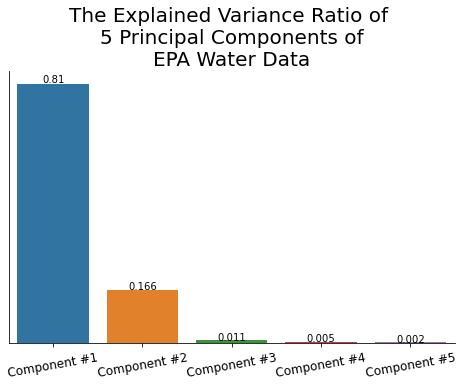

In [24]:
pca_bio = pca.explained_variance_ratio_

fig, ax = plt.subplots(1, figsize=(8,5))

sns.barplot(x=list(range(len(pca_bio))), y=pca_bio, ax=ax)
ax.set_title('The Explained Variance Ratio of \n5 Principal Components of\nEPA Water Data', fontsize=20)
ax.set_xticklabels(labels=[f"Component #{x}" for x in range(1, len(pca_chem)+1)], fontsize=12);
ax.tick_params(axis='y', which='both', left=False, labelleft=False)
ax.xaxis.set_tick_params(labelrotation=10)
ax.set_xlabel('')
sns.despine(fig)

# label bars
for bar in ax.patches:
    bar_height = round(bar.get_height(), 3)
    ax.annotate(bar_height, (bar.get_x() + bar.get_width()/2, bar.get_height()*1.01), 
                ha='center', color='black', fontsize=10)
    
fig.savefig(f'images/river_pca.png', transparent=True, bbox_inches="tight");